In [3]:
import numpy as np
import xarray as xr
import scipy.signal as sg
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import patches
import npc_lims
from npc_sessions import DynamicRoutingSession
from dynamic_routing_analysis import spike_utils
import os

%load_ext autoreload
%autoreload 2
%matplotlib widget


In [79]:
# load session
session = DynamicRoutingSession('666986_2023-08-15')
# session = DynamicRoutingSession('620263_2022-07-26')

In [85]:
session.is_opto

False

In [80]:
session.subject

subject pynwb.file.Subject at 0x2936403600976
Fields:
  age: P200D
  age__reference: birth
  date_of_birth: 2023-01-26 20:23:01-08:00
  genotype: Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
  sex: M
  species: Mus musculus
  strain: Sst-IRES-Cre;Ai32
  subject_id: 666986

In [84]:
session.epochs[:]

,start_time,stop_time,notes,tags
id,,,,
0,13450.379480,14310.480380,,[RFMapping]
1,14321.742867,14610.481900,,[OptoTagging]
2,14620.660079,15223.782259,,[Spontaneous]
3,15234.958268,15835.444908,,"[SpontaneousRewards, rewards]"
4,15845.553637,19491.306360,,"[DynamicRouting1, rewards]"
5,19502.401925,20102.871834,,"[SpontaneousRewards, rewards]"
6,20114.698584,20401.752650,,[OptoTagging]


In [7]:
optotagging=pd.read_parquet(
            npc_lims.get_cache_path('optotagging',session.id,version='v0.0.173')
        )
units=pd.read_parquet(
            npc_lims.get_cache_path('units',session.id,version='v0.0.173')
        )

In [64]:
optotagging

,start_time,stop_time,trial_index,stim_start_time,stim_stop_time,stim_name,duration,location,bregma_x,bregma_y,power,session_idx,date,subject_id
id,,,,,,,,,,,,,,
0,14322.67297,14323.08547,0,14322.87297,14322.88547,square,0.01,probeE,-0.70,-3.00,5.0,0,2023-08-15,666986
1,14323.70337,14324.11587,1,14323.90337,14323.91587,square,0.01,probeD,-1.40,-4.45,5.0,0,2023-08-15,666986
2,14324.96495,14325.56745,2,14325.16495,14325.36745,square,0.20,probeC,-0.50,0.30,5.0,0,2023-08-15,666986
3,14326.05430,14326.65680,3,14326.25430,14326.45680,square,0.20,probeF,-0.75,-1.80,5.0,0,2023-08-15,666986
4,14327.23161,14327.64411,4,14327.43161,14327.44411,square,0.01,probeB,-1.10,1.45,5.0,0,2023-08-15,666986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20396.05883,20396.66133,245,20396.25883,20396.46133,square,0.20,probeE,-0.70,-3.00,5.0,0,2023-08-15,666986
496,20397.17565,20397.77815,246,20397.37565,20397.57815,square,0.20,probeB,-1.10,1.45,5.0,0,2023-08-15,666986
497,20398.21047,20398.81297,247,20398.41047,20398.61297,square,0.20,probeC,-0.50,0.30,5.0,0,2023-08-15,666986


In [8]:
optotagging['start_time'][1:]-optotagging['stop_time'][:-1]

id
0         NaN
1     -0.4125
2     -0.6025
3     -0.6025
4     -0.4125
        ...  
495   -0.6025
496   -0.6025
497   -0.6025
498   -0.4125
499       NaN
Length: 500, dtype: float64

In [88]:
units.columns

Index(['num_spikes', 'firing_rate', 'presence_ratio', 'snr',
       'isi_violations_ratio', 'isi_violations_count', 'rp_contamination',
       'rp_violations', 'sliding_rp_violation', 'amplitude_cutoff',
       'drift_ptp', 'drift_std', 'drift_mad', 'isolation_distance', 'l_ratio',
       'd_prime', 'peak_to_valley', 'peak_trough_ratio', 'half_width',
       'repolarization_slope', 'recovery_slope', 'electrode_group_name',
       'peak_channel', 'cluster_id', 'default_qc', 'amplitude', 'channels',
       'unit_id', 'group_name', 'ccf_ap', 'ccf_dv', 'ccf_ml', 'structure',
       'location', 'peak_electrode', 'spike_times', 'obs_intervals',
       'electrodes', 'waveform_mean', 'waveform_sd', 'device_name',
       'session_idx', 'date', 'subject_id'],
      dtype='object')

In [89]:
units_filt=units.query('isi_violations_ratio<=0.1 and presence_ratio>=0.99')
# units_filt

In [90]:
# make opto data array
#make trial aligned 3d spike tensor
time_before = 0.2
time_after = 0.4
binsize = 0.001
optotagging_da = spike_utils.make_neuron_time_trials_tensor(units_filt, optotagging, time_before, time_after, binsize)

In [ ]:
# sel_unit

In [ ]:
# units.query('unit_id==@sel_unit')

In [97]:
sel_probe="probeB"
sel_dur=0.2
probe_dur_subset_trials = optotagging.query('location == @sel_probe and duration == @sel_dur').index.values

long_baseline_mean = optotagging_da.sel(trials=probe_dur_subset_trials,time=slice(-0.19,0)).mean(dim='time')
long_stim_mean = optotagging_da.sel(trials=probe_dur_subset_trials,time=slice(0.005,0.195)).mean(dim='time')
long_diff = long_stim_mean - long_baseline_mean

In [98]:
long_diff.mean(dim='trials').values

array([ -6.84210526, -18.31578947, -16.10526316, ...,  -1.78947368,
       -12.94736842,  -1.47368421])

In [100]:
sig_resp_long=np.full(units_filt.unit_id.size,np.nan)

for uu,uid in enumerate(units_filt.unit_id):
    if (long_baseline_mean.sel(unit_id=uid)-long_stim_mean.sel(unit_id=uid)).mean().values>0:
        _,sig_resp_long[uu]=st.wilcoxon(long_baseline_mean.sel(unit_id=uid),long_stim_mean.sel(unit_id=uid))
    else:
        sig_resp_long[uu]=1

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-val

(array([  2.,   5.,  20., 950., 200.,   6.,   3.,   2.,   0.,   1.]),
 array([-73.78947368, -55.2       , -36.61052632, -18.02105263,
          0.56842105,  19.15789474,  37.74736842,  56.33684211,
         74.92631579,  93.51578947, 112.10526316]),
 <BarContainer object of 10 artists>)

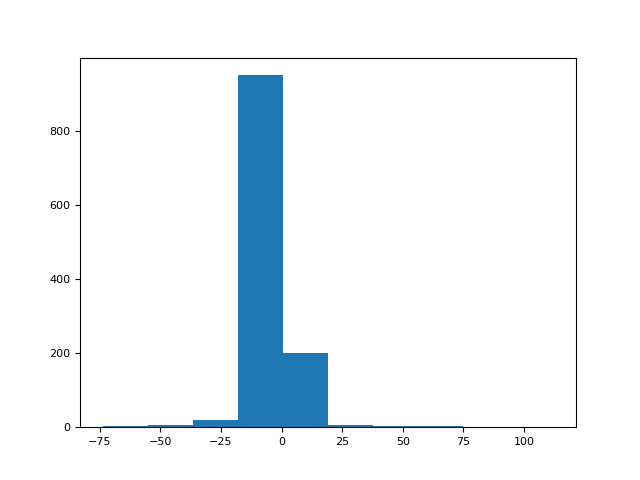

In [101]:
fig,ax=plt.subplots()
ax.hist(long_diff.mean(dim='trials').values)

In [37]:
uid

'668755_2023-08-31_C-503'

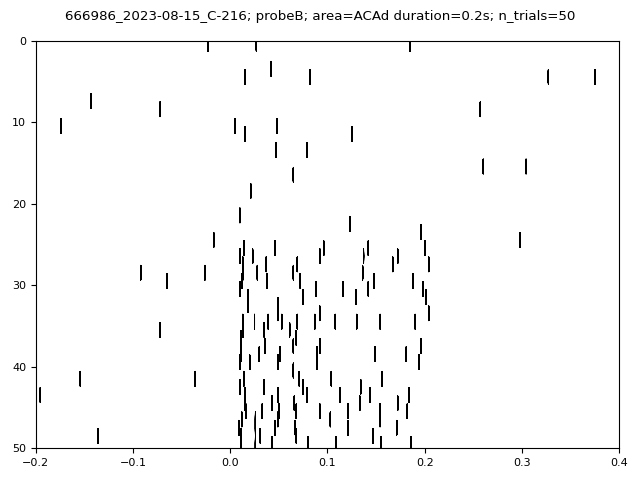

In [ ]:
sel_probe="probeB"
sel_dur=0.2
# sel_unit = units_filt.query('electrode_group_name == @sel_probe and firing_rate>5')['unit_id'].iloc[25]
# sel_unit = units_filt['unit_id'].iloc[np.where(sig_resp_long<0.01)[0][0]]
sel_unit = units_filt['unit_id'].iloc[np.where(np.abs(long_diff.mean(dim='trials').values)>5)[0][2]]
unit_area=units_filt.query('unit_id==@sel_unit')['structure'].iloc[0]


probe_dur_subset_trials = optotagging.query('location == @sel_probe and duration == @sel_dur').index.values

unit_da=optotagging_da.sel(trials=probe_dur_subset_trials,unit_id=sel_unit)

fig,ax=plt.subplots(1,1)
ax.imshow(unit_da.values.T,aspect='auto',cmap='Greys',vmin=0,vmax=1,
          extent=[-time_before,time_after,0,len(probe_dur_subset_trials)])
ax.invert_yaxis()
fig.suptitle(f'{sel_unit}; {sel_probe}; area={unit_area} duration={sel_dur}s; n_trials={len(probe_dur_subset_trials)}')
fig.tight_layout()

In [1]:
# optotagging_da.sel(trials=probe_dur_subset_trials,unit_id=sel_unit)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import os
import argparse
from dynamic_routing_analysis.vbn_utils import *

save_dir = r"D:\testing\opto_metrics"

session = DynamicRoutingSession('666986_2023-08-15')


In [12]:
optotagging_table=pd.read_parquet(
            npc_lims.get_cache_path('optotagging',session.id,version='v0.0.173')
        )

start_times = optotagging_table.groupby(by=['duration', 'location'])['start_time'].apply(list)
durations = start_times.index.get_level_values(0)
locations = start_times.index.get_level_values(1)

In [22]:
opto_condition=[]
for rr,row in optotagging_table.iterrows():
    if row['duration'] == 0.2:
        opto_condition.append('long')
    elif row['duration'] == 0.01:
        opto_condition.append('short')

optotagging_table['condition'] = opto_condition
optotagging_table

,start_time,stop_time,trial_index,stim_start_time,stim_stop_time,stim_name,duration,location,bregma_x,bregma_y,power,session_idx,date,subject_id,condition
id,,,,,,,,,,,,,,,
0,14322.67297,14323.08547,0,14322.87297,14322.88547,square,0.01,probeE,-0.70,-3.00,5.0,0,2023-08-15,666986,short
1,14323.70337,14324.11587,1,14323.90337,14323.91587,square,0.01,probeD,-1.40,-4.45,5.0,0,2023-08-15,666986,short
2,14324.96495,14325.56745,2,14325.16495,14325.36745,square,0.20,probeC,-0.50,0.30,5.0,0,2023-08-15,666986,long
3,14326.05430,14326.65680,3,14326.25430,14326.45680,square,0.20,probeF,-0.75,-1.80,5.0,0,2023-08-15,666986,long
4,14327.23161,14327.64411,4,14327.43161,14327.44411,square,0.01,probeB,-1.10,1.45,5.0,0,2023-08-15,666986,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20396.05883,20396.66133,245,20396.25883,20396.46133,square,0.20,probeE,-0.70,-3.00,5.0,0,2023-08-15,666986,long
496,20397.17565,20397.77815,246,20397.37565,20397.57815,square,0.20,probeB,-1.10,1.45,5.0,0,2023-08-15,666986,long
497,20398.21047,20398.81297,247,20398.41047,20398.61297,square,0.20,probeC,-0.50,0.30,5.0,0,2023-08-15,666986,long


In [26]:
# sess_id = session.id
# spike_times = session.spike_times
save_location = save_dir

optotagging_table=pd.read_parquet(
            npc_lims.get_cache_path('optotagging',session.id,version='v0.0.173')
        )
units=pd.read_parquet(
            npc_lims.get_cache_path('units',session.id,version='v0.0.173')
        )

#hard coded short vs long conditions
opto_condition=[]
for rr,row in optotagging_table.iterrows():
    if row['duration'] == 0.2:
        opto_condition.append('long')
    elif row['duration'] == 0.01:
        opto_condition.append('short')

optotagging_table['condition'] = opto_condition

start_times = optotagging_table.groupby(by=['condition', 'location'])['start_time'].apply(list)
durations = start_times.index.get_level_values(0)
locations = start_times.index.get_level_values(1)

censor_period = 0.005
baseline_starts = optotagging_table['stop_time'].values[:-1] + censor_period
baseline_ends = optotagging_table['start_time'].values[1:] - censor_period
min_gap = np.min(baseline_ends - baseline_starts)
baseline_starts = baseline_starts + min_gap/2
total_baseline_time = np.sum(baseline_ends-baseline_starts)

min_iti = optotagging_table['start_time'].diff().min()
csalt_baseline_starts = optotagging_table['start_time'] + min_iti-0.3
#csalt_baseline_starts = np.random.choice(baseline_starts, 200, replace=False)
#csalt_baseline_starts = np.copy(baseline_starts)

metrics = [mean_trial_spike_rate, cv_trial_spike_rate, csalt, 
        first_spike_jitter, first_spike_latency, 
        fraction_time_responsive, fraction_trials_responsive]
metric_dict = {str(dur)+'_'+str(loc)+'_'+met.__name__:[] for dur in durations for loc in locations for met in metrics}
metric_dict.update({'uid':[], 'long_baseline_mean' :[], 'short_baseline_mean': [],
                'long_baseline_std': [], 'short_baseline_std': []})
censor_period=0.0015
#change to do this automatically for diff durations
durations = {'long': 0.020-2*censor_period, 'short': 0.01-2*censor_period}
binsizes = {'long': 0.001, 'short': 0.001}

#make spike tensor first? Would speed up a lot

for counter, (u, unit) in enumerate(units.iterrows()):
    #print(f'running {u}, {counter+1} of {len(cortical_units)}')
    spikes = unit['spike_times']
    metric_dict['uid'].append(u)
    baseline_mean_rates = {d: get_baseline_bin_rates(spikes, baseline_starts, baseline_ends, binsize=durations[d]) for d in durations}
    metric_dict['long_baseline_mean'].append(np.mean(baseline_mean_rates['long']))
    metric_dict['long_baseline_std'].append(np.std(baseline_mean_rates['long']))
    metric_dict['short_baseline_mean'].append(np.mean(baseline_mean_rates['short']))
    metric_dict['short_baseline_std'].append(np.std(baseline_mean_rates['short']))
    
    baseline_bin_rates = {d: get_baseline_bin_rates(spikes, baseline_starts, baseline_ends, binsize=binsizes[d]) for d in durations}

    for starts, duration, location in zip(start_times, durations, locations):
        # duration = durations[duration]
        starts=np.array(starts)
        
        for m in metrics:
            name = m.__name__
            col_name = duration+'_'+str(location)+'_'+name
            if name == 'csalt':
                metric_dict[col_name].append(m(spikes, starts, csalt_baseline_starts))
            elif 'fraction' in name:
                metric_dict[col_name].append(m(spikes, starts, 0, durations[duration], 
                                            baseline_bin_rates[duration], binsizes[duration]))
            else:
                metric_dict[col_name].append(m(spikes, starts+censor_period, durations[duration]))
        

metric_df = pd.DataFrame(metric_dict)

metric_df.to_csv(os.path.join(save_location, session.id + '_opto_metrics.csv'))

ValueError: All arrays must be of the same length

In [29]:
for key in metric_dict.keys():
    print(key, len(metric_dict[key]))
# metric_dict

long_probeB_mean_trial_spike_rate 1979
long_probeB_cv_trial_spike_rate 1979
long_probeB_csalt 1979
long_probeB_first_spike_jitter 1979
long_probeB_first_spike_latency 1979
long_probeB_fraction_time_responsive 1979
long_probeB_fraction_trials_responsive 1979
long_probeC_mean_trial_spike_rate 0
long_probeC_cv_trial_spike_rate 0
long_probeC_csalt 0
long_probeC_first_spike_jitter 0
long_probeC_first_spike_latency 0
long_probeC_fraction_time_responsive 0
long_probeC_fraction_trials_responsive 0
long_probeD_mean_trial_spike_rate 0
long_probeD_cv_trial_spike_rate 0
long_probeD_csalt 0
long_probeD_first_spike_jitter 0
long_probeD_first_spike_latency 0
long_probeD_fraction_time_responsive 0
long_probeD_fraction_trials_responsive 0
long_probeE_mean_trial_spike_rate 0
long_probeE_cv_trial_spike_rate 0
long_probeE_csalt 0
long_probeE_first_spike_jitter 0
long_probeE_first_spike_latency 0
long_probeE_fraction_time_responsive 0
long_probeE_fraction_trials_responsive 0
long_probeF_mean_trial_spike_ra

In [ ]:
# save dict
import pickle
with open(os.path.join(save_location, session.id + '_opto_metrics.pkl'), 'wb') as f:
    pickle.dump(metric_dict, f)

In [25]:
durations

{'long': 0.017, 'short': 0.007}

In [ ]:
metric_df